<a href="https://colab.research.google.com/github/serjisa/fastglmpca/blob/main/examples/scRNA-Seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processing of PBMC dataset with `fastglmpca`

In [ ]:
!pip install scanpy fastglmpca

In [3]:
import scanpy as sc
import fastglmpca

Here we're downloading two datasets: raw (`sc.datasets.pbmc3k()`) — to take count matrix from it — and processed (`sc.datasets.pbmc3k_processed()`) — to keep cells' annotation for visualization purposes.

In [ ]:
adata_processed = sc.datasets.pbmc3k_processed()

adata = sc.datasets.pbmc3k()[adata_processed.obs_names]
adata.obs["cell_type"] = adata_processed.obs["louvain"]

Now it's time for the most computationally expensive procedure — GLM-PCA calculation. It's highly recommended to use Google Colab for it.

In [5]:
adata.obsm["X_glmpca"] = fastglmpca.poisson(adata.X, n_pcs=20)

GLM-PCA Iterations:  12%|█▏        | 119/1000 [02:47<20:36,  1.40s/it]


Convergence reached after 120 iterations.


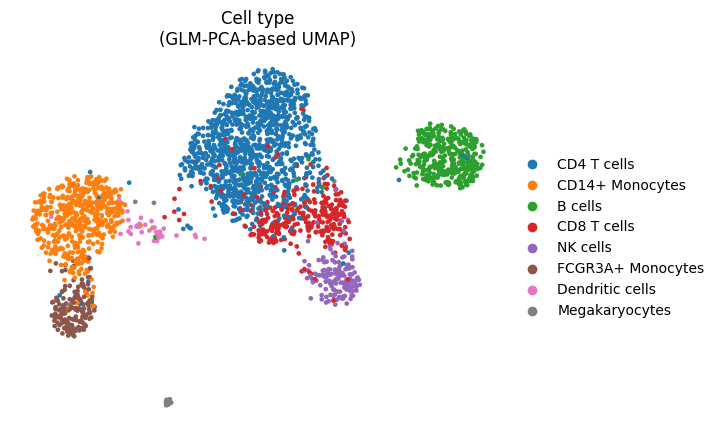

In [6]:
sc.pp.neighbors(adata, use_rep="X_glmpca")
sc.tl.umap(adata)

sc.pl.umap(adata, color="cell_type", frameon=False,
           title="Cell type\n(GLM-PCA-based UMAP)")